# Chat ou Chien !! une méthode d'apprentissage automatique.

Dans une entreprise de marketing, on veut faire une étude sur les clients qui fréquentent un grand magasin. L'idée est d'estimer le pourcentage de clients qui ont des chats et ceux qui ont des chiens, afin de prendre des décisions marketing ciblées. Vous proposez d'utiliser une caméra pour détecter et compter les deux animaux dans le magasin. La première étape du projet est de développer un modèle qui peut détecter le chat ou le chien. Ainsi, dans ce brief, en utilisant une base de données, vous allez entrainer un modèle d'apprentissage automatique avec un apprentissage supervisé.

# Veille technologique: Opencv python

- Préparation données imagerie pour méthode classique d'apprentissage automatique
- Entrainement et évaluation (similaire aux briefs précédents)

## Operations Simples

In [1]:
# use opencv to load and display the image
import os
from os import listdir
import cv2
from skimage.io import imread, imsave, imshow
import numpy as np
from numpy import load
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from numpy import save, asarray
from functools import partial




In [2]:
# Préparer data 
size = 150
# repertoir d'images avec deux sous dossiers "Cat" et "Dog"
image_directory = r"C:/Users/utilisateur/Downloads/kagglecatsanddogs_3367a/PetImages"
images = []  # liste pour images  
label = []  # liste pour Label (0 ou 1) pour deux classes.

# utiliser "os" pour avoir les noms des images dans chaque sous dossier
cat_images = os.listdir("PetImages/Cat")
dog_images = os.listdir("PetImages/Dog")

In [20]:
#boucle

dim=(size,size)

#chat
for file_name in cat_images:
    path=image_directory+"/Cat/"+file_name
    try:
        img=imread(path)
        img=cv2.resize(img,dim,interpolation=cv2.INTER_AREA)
        img=np.array(img)
        
        
        if(img.shape[2]>3):
            img_temp=np.copy(img[:,:,0:3])
            img=np.copy(img_temp)
            
    except:
            print(f"erreur sur l'image {file_name}")
    
    else:
        images.append(img)
        label.append(0)
        
    
    
#chien
for file_name in dog_images:
    path=image_directory+"/Dog/"+file_name
    try:
        img=imread(path)
        img=cv2.resize(img,dim,interpolation=cv2.INTER_AREA)
        img=np.array(img)
        
        
        if(img.shape[2]>3):
            img_temp=np.copy(img[:,:,0:3])
            img=np.copy(img_temp)
            
    except:
        print(f"erreur sur l'image {file_name}")
        
    else:
        images.append(img)
        label.append(1)

erreur sur l'image 10404.jpg
erreur sur l'image 2939.jpg
erreur sur l'image 5686.jpg
erreur sur l'image 666.jpg
erreur sur l'image 7276.jpg
erreur sur l'image 11702.jpg
erreur sur l'image 1308.jpg
erreur sur l'image 1773.jpg
erreur sur l'image 3823.jpg


C:\Users\utilisateur\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [7]:
"""
# utiliser une boucle pour lire chaque image, redimensionner en (150,150,3),
# et la mettre dans images, et mettre le label(0 ou 1) selon le type dans "label"

for file in listdir("PetImages/Dog/"):
   
    #load image
    
    try:
        image=np.float32(load_img("PetImages/Dog/"+file))
        resized=cv2.resize(image,(size,size), interpolation=cv2.INTER_AREA)
      
        #convert to numpy array
        image=img_to_array(image)
        images.append(image)
        label.append(0)
        
    except:
        print(f"erreur sur l'image {file}")
        
    #else:
        #images.append(image)
        #label.append(0)


for file in listdir("PetImages/Cat/"):
    
   
    #load image
    
    try:
        image=np.float32(load_img("PetImages/Cat/"+file))
        resized=cv2.resize(image,(size,size), interpolation=cv2.INTER_AREA)
        #convert to numpy array
        image=img_to_array(image)
        images.append(image)
        label.append(1)
    except:
        print(f"erreur sur l'image {file}")
        
    #else:
        #images.append(image)
        #label.append(1)


    
    #convert to a numpy array
images=asarray(images)
label=asarray(label)
            
# il y a des images corrumpues, utiliser try ... catch except pour les ignorer


"""


'\n# utiliser une boucle pour lire chaque image, redimensionner en (150,150,3),\n# et la mettre dans images, et mettre le label(0 ou 1) selon le type dans "label"\n\nfor file in listdir("PetImages/Dog/"):\n   \n    #load image\n    \n    try:\n        image=np.float32(load_img("PetImages/Dog/"+file))\n        resized=cv2.resize(image,(size,size), interpolation=cv2.INTER_AREA)\n      \n        #convert to numpy array\n        image=img_to_array(image)\n        images.append(image)\n        label.append(0)\n        \n    except:\n        print(f"erreur sur l\'image {file}")\n        \n    #else:\n        #images.append(image)\n        #label.append(0)\n\n\nfor file in listdir("PetImages/Cat/"):\n    \n   \n    #load image\n    \n    try:\n        image=np.float32(load_img("PetImages/Cat/"+file))\n        resized=cv2.resize(image,(size,size), interpolation=cv2.INTER_AREA)\n        #convert to numpy array\n        image=img_to_array(image)\n        images.append(image)\n        label.appen

In [21]:
# show shape
print(len(images))
print(len(label))

49982
49982


In [22]:
# transformer les listes en numpy 
np_images = np.array(images)
np_label = np.array(label)

In [23]:
# save data as ".npy" file
np.save("dog_cat_images.npy",images)
np.save("dog_cat_label.npy",label)


In [24]:
# show shape
print(np_images.shape)
print(np_label.shape)

(49982, 150, 150, 3)
(49982,)


In [2]:
# prepare data for classical machine learning model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [ ]:
C:\Users\utilisateur\OneDrive - Simplonformations.co\Bureau\Formation IA\Story_25_CNN

In [3]:
X=np.load("C:/Users/utilisateur/OneDrive - Simplonformations.co/Bureau/Formation IA/Story_25_CNN/dog_cat_images.npy")
y=np.load("C:/Users/utilisateur/OneDrive - Simplonformations.co/Bureau/Formation IA/Story_25_CNN/dog_cat_label.npy")
#X_reshaped=np.reshape(X,(X.shape[0],150*150*3))

In [27]:
X_reshaped.shape

(49982, 67500)

In [4]:
# split les données en train et test avec "stratification"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [16]:
X_train.shape

(39985, 150, 150, 3)

In [30]:
X_test.shape

(16495, 67500)

In [31]:
y_train.sum()

8372

In [32]:
y_test.sum()

4124

In [35]:
#initialiser le classifierc
clf=RandomForestClassifier(n_estimators=100,max_depth=20,random_state=0,verbose=2)
#entrainer le classifier
clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 19.3min finished


RandomForestClassifier(max_depth=20, random_state=0, verbose=2)

In [36]:
# evaluate classifier
from sklearn.metrics import classification_report
# predire
y_pred = clf.predict(X_test)
# evaluer avec classification_report
print(classification_report(y_test, y_pred, target_names=["chat","chien"]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


              precision    recall  f1-score   support

        chat       0.70      0.78      0.74     12371
       chien       0.00      0.00      0.00      4124

    accuracy                           0.59     16495
   macro avg       0.35      0.39      0.37     16495
weighted avg       0.53      0.59      0.55     16495



In [27]:
"""#Créer répertoires
dataset_home="dataset_dogs_vs_cats/"
subdirs=["train/","test/"]
for subdir in subdirs:
    #create label subdirectories
    labeldirs=["dogs/","cats/"]
    for labldir in labeldirs:
        newdir=dataset_home+subdir+labldir
        os.makedirs(newdir,exist_ok=True)"""

In [28]:
"""#retenir au hasard 25% des images dans l'ensemble de données de test
#seed random number generator
seed(1)
#define ration of picture to use for validation
val_ratio=0.25
#copy training dataset images into subdirectories
src_directory="C:/Users/utilisateur/dataset_dogs_vs_cats/train"
for file in listdir(src_directory):
    src=src_directory+"/"+file
    dst_dir="train/"
    if random()<val_ratio:
        dst_dir="test/"
    if file.startswith("1"):
        dst=dataset_home+dst_dir+"cats/"+file
        copyfile(src,dst)
    elif file.startswith("0"):
        dst=dataset_home+dst_dir+"dogs/"+file
        copyfile(src,dst)"""

### Essayer de normaliser chaque image entre 0 et 255 et rentrainer le modèle. Y a-t-il une amélioration ?

# Neural networ MLP

Entrainer un modèle MLP pour detecter la class Dog ou Cat.

In [5]:
# use PCA to reduce dimensions
# check this tuto: https://www.askpython.com/python/examples/principal-component-analysis-for-image-data
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D,GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


# creer un reseau de neurone avec une couche d'entrée de taille (150*150*3), deux couches caché de taille 128 et une activation "relu". 
# Dernière couche de taille 1 avec une activation sigmoid. Choisir la bonne "loss function" et "optimizer"


# ResNet-34


In [6]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

In [7]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)


In [8]:
#def create_model(lyrs=128,activation="elu", optimizer="adam", loss='SparseCategoricalCrossentropy', dr=0.2):
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[150, 150, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2, activation="softmax"))

In [9]:
model.compile(optimizer="adam",loss="SparseCategoricalCrossentropy",metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 64)        9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 38, 38, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 38, 38, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 38, 38, 64)        7

In [12]:
history2=model.fit( X_train,y_train,epochs=10,
                  batch_size=128,validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 4585s 18s/step - loss: 0.5823 - accuracy: 0.7389 - val_loss: 0.6523 - val_accuracy: 0.5986
Epoch 2/10
250/250 [==============================] - 4537s 18s/step - loss: 0.5303 - accuracy: 0.7387 - val_loss: 0.5698 - val_accuracy: 0.7305
Epoch 3/10
250/250 [==============================] - 4603s 18s/step - loss: 0.5184 - accuracy: 0.7394 - val_loss: 0.5415 - val_accuracy: 0.7545
Epoch 4/10
250/250 [==============================] - 4433s 18s/step - loss: 0.4953 - accuracy: 0.7406 - val_loss: 0.5389 - val_accuracy: 0.7434
Epoch 5/10
250/250 [==============================] - 4405s 18s/step - loss: 0.4797 - accuracy: 0.7398 - val_loss: 0.6434 - val_accuracy: 0.7547
Epoch 6/10
250/250 [==============================] - 4301s 17s/step - loss: 0.4632 - accuracy: 0.7388 - val_loss: 0.8317 - val_accuracy: 0.7547
Epoch 7/10
250/250 [==============================] - 4399s 18s/step - loss: 0.4392 - accuracy: 0.7456 - val_loss: 0.5562 - val_ac

In [16]:
_,train_acc=model.evaluate(X_train,y_train)
_,test_acc=model.evaluate(X_test,y_test)
print(f"Train ; {train_acc}, Test: {test_acc}")

313/313 [==============================] - 235s 750ms/step - loss: 0.4432 - accuracy: 0.7342
Train ; 0.7490308880805969, Test: 0.7342202663421631


In [13]:
import matplotlib.pyplot as plt

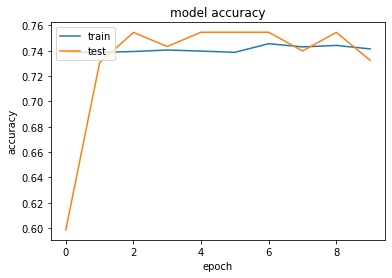

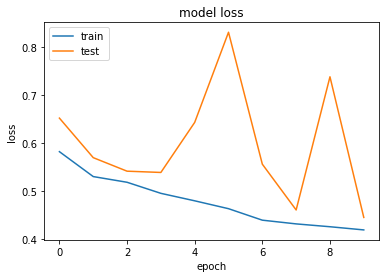

In [15]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Approche classique

In [40]:
# entrainer le modèle avec validation_split = 2, epochs = 20, et un batch_size = 128



def create_model(lyrs=128,activation="elu", optimizer="adam", loss='SparseCategoricalCrossentropy', dr=0.2):
    num_classes = 2
    
    #Set ranfom seed for reproducibility
    seed(42)
    set_seed(42)
    
    model = tf.keras.Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255))#normalise de 0 a 1
    model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation=activation,input_shape=(150,150,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))#réduit l'image
    model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation=activation))
    model.add(MaxPooling2D())#prend le max du pooling
    model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation=activation))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation=activation))
    model.add(MaxPooling2D())
    
    model.add(Flatten())#permet de construire un vecteur
    model.add(kayers.dropout(rate=0.2))
    model.add(Dense(lyrs,activation=activation))
    model.add(kayers.dropout(rate=0.2))
    model.add(Dense(250,activation=activation))
    model.add(kayers.dropout(rate=0.2))    
    model.add(Dense(80,activation=activation))
    model.add(kayers.dropout(rate=0.2))
    model.add(Dense(32,activation=activation))
    model.add(kayers.dropout(rate=0.2))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

    return model


In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)      

In [43]:
model=create_model(lyrs=300,activation="relu", optimizer="adam", loss='SparseCategoricalCrossentropy', dr=0.2)

In [44]:
history=model.fit( X_train,y_train,epochs=20,
                  batch_size=128,validation_split=0.2)


Epoch 1/20
250/250 [==============================] - 1259s 5s/step - loss: 0.5551 - accuracy: 0.7436 - val_loss: 0.5785 - val_accuracy: 0.7547
Epoch 2/20
250/250 [==============================] - 1243s 5s/step - loss: 0.5214 - accuracy: 0.7474 - val_loss: 0.5118 - val_accuracy: 0.7547
Epoch 3/20
250/250 [==============================] - 1164s 5s/step - loss: 0.4977 - accuracy: 0.7478 - val_loss: 0.5335 - val_accuracy: 0.7547
Epoch 4/20
250/250 [==============================] - 1111s 4s/step - loss: 0.4737 - accuracy: 0.7479 - val_loss: 0.4819 - val_accuracy: 0.7537
Epoch 5/20
250/250 [==============================] - 1148s 5s/step - loss: 0.4565 - accuracy: 0.7462 - val_loss: 0.5009 - val_accuracy: 0.7529
Epoch 6/20
 84/250 [=========>....................] - ETA: 11:53 - loss: 0.4311 - accuracy: 0.7479

KeyboardInterrupt: 

In [10]:
# evaluate MLP
# evaluate classifier
from sklearn.metrics import classification_report
# predire
y_pred=model.predict(X_test)
print(y_pred)

[[0.8062827  0.19371729]
 [0.64334524 0.35665482]
 [0.5990505  0.40094948]
 ...
 [0.8076638  0.19233613]
 [0.62274754 0.37725246]
 [0.7467935  0.25320652]]


In [107]:
y_pred.shape

(16495, 2)

In [11]:
_,train_acc=model.evaluate(X_train,y_train)
_,test_acc=model.evaluate(X_test,y_test)
print(f"Train ; {train_acc}, Test: {test_acc}")

516/516 [==============================] - 11s 22ms/step - loss: 0.5525 - accuracy: 0.7500
Train ; 0.7499925494194031, Test: 0.749984860420227


#Courbe d'apprentissage

In [12]:
import matplotlib.pyplot as plt

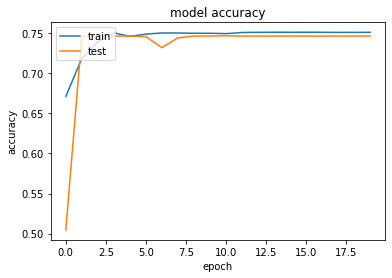

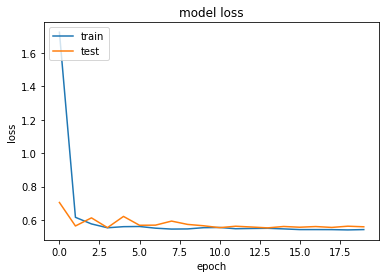

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:

    

"""Je crois que c'est parce que les images ne sont pas toutes (x,x,3), il y en a qui sont (x,x,4) comme l'image 10125 des chats :
(346, 259, 4)"""




    """Du coup, quand on charge les images, il faut vérifier celles qui n'ont pas (x,x,3)
​[mardi 00:48] Alan VITREY
    Pour moi ça fonctionne bien avec asarray en faisant ça.
​[mardi 00:50] Alan VITREY
    Mon code :"""

images = []  # liste pour images  
labels = []  # liste pour Label (0 ou 1) pour deux classes.



# utiliser une boucle pour lire chaque image, redimensionner en (150,150,3),
# et la mettre dans images, et mettre le label(0 ou 1) selon le type dans "label"
for subfolder in listdir(folder):
    # determine class
    output = 0.0
    if subfolder.startswith('Dog'):
        output = 1.0
    for file in listdir(folder +subfolder) :
        # load image
        try :
            #print(folder +subfolder + "/" + file)
            image = imread(folder +subfolder + "/" + file)
            image_temp = image.copy()
            if image_temp.shape[2] != 3 :
                print(image_temp.shape, file)
                image_temp2=image_temp[:,:,0:3]
                print(image_temp2.shape, file)
                plt.figure(file,(10,10))
                plt.subplot(121),plt.imshow(image_temp, cmap = 'jet')
                plt.title('Input Image'), plt.xticks([]), plt.yticks([])
                plt.subplot(122),plt.imshow(image_temp2, cmap = 'jet')
                plt.show()
                image_temp = image_temp2
            
            image_resized = cv2.resize(image_temp, (size,size), interpolation = cv2.INTER_CUBIC)
            # convert to numpy array
            image_array = np.array(image_resized)
            # store
            images.append(image_array)
            labels.append(output)
        except (IndexError, ValueError,SyntaxError):
            print('IndexError', 'ValueError','SyntaxError')

images_array = asarray(images)
labels = asarray(labels)


